<a href="https://colab.research.google.com/github/Duckie2369/MNIST-Digits-Classification-on-FPGA/blob/main/MNIST_Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [1]:
import keras
import tensorflow as tf

# Data

In [2]:
!wget https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz

--2025-05-14 02:29:18--  https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.107.207, 74.125.196.207, 74.125.134.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.107.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11490434 (11M) [application/octet-stream]
Saving to: ‘mnist.npz’

mnist.npz           100%[===================>]  10.96M  --.-KB/s    in 0.1s    

2025-05-14 02:29:18 (95.6 MB/s) - ‘mnist.npz’ saved [11490434/11490434]



In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data(path="mnist.npz")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
# Reshaping x_train
X = x_train.reshape((60000, 28, 28, 1))
X = X.repeat(3, -1) # repeat the last (-1) dimension three times
x_train = tf.convert_to_tensor(X)
assert x_train.shape == (60000, 28, 28, 3)

In [7]:
# Reshaping x_train
X = x_test.reshape((10000, 28, 28, 1))
X = X.repeat(3, -1) # repeat the last (-1) dimension three times
x_test = tf.convert_to_tensor(X)
assert x_test.shape == (10000, 28, 28, 3)

In [8]:
print(x_train.shape,type(x_train))

(60000, 28, 28, 3) <class 'tensorflow.python.framework.ops.EagerTensor'>


In [9]:
print(x_test.shape,type(x_test))

(10000, 28, 28, 3) <class 'tensorflow.python.framework.ops.EagerTensor'>


In [10]:
from keras.utils import to_categorical # Converting to array which has columns equal to the number of categories in the data
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
print(y_train)
print(y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Visualize Examples

In [12]:
from matplotlib import pyplot as plt
import numpy as np
# print(y_train[3])
def imageFormat(image1):
  image1 = np.array(image1, dtype='float')
  pixels = image1.reshape((28, 28, 3))
  return pixels

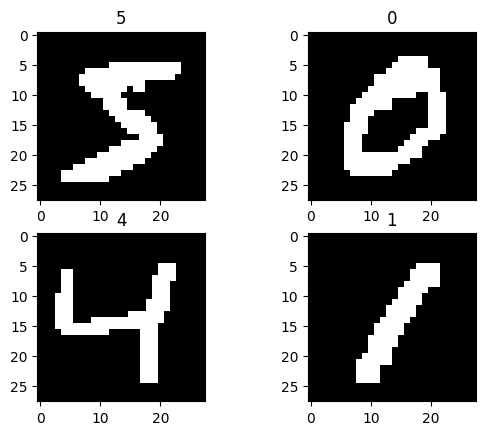

In [13]:
f, axarr = plt.subplots(2,2) # axarr array of axis
axarr[0,0].imshow(imageFormat(x_train[0]), label="1111")
axarr[0,0].title.set_text(np.argmax(y_train[0]))
axarr[0,1].imshow(imageFormat(x_train[1]), label="1111")
axarr[0,1].title.set_text(np.argmax(y_train[1]))
axarr[1,0].imshow(imageFormat(x_train[2]), label="1111")
axarr[1,0].title.set_text(np.argmax(y_train[2]))
axarr[1,1].imshow(imageFormat(x_train[3]), label="1111")
axarr[1,1].title.set_text(np.argmax(y_train[3]))

# Importing Libraries

In [14]:
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
print("Libs imported")

IMAGE_SIZE = [32, 32]

Libs imported


# Using a pretrained ResNet50 CNN Model

In [15]:
resnet = ResNet50(include_top=False, pooling='none', input_shape=IMAGE_SIZE +[3], weights='imagenet')

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [48]:
cfg = resnet.get_config()
cfg['layers'][0]['config']['batch_input_shape'] = (None, 28, 28, 3) # can accept input data of the defined batch size
resnet = Model.from_config(cfg)

In [17]:
for layers in resnet.layers:
  layers.trainable = False

In [18]:
# Taking the output of the last convolution block in ResNet50
X=Flatten()(resnet.output)
# Adding a fully connected layer having 10 neurons
no_classes = 10
prediction = Dense(no_classes, activation='softmax')(X)

In [19]:
# Model training
model = Model(inputs=resnet.input, outputs=prediction)

In [20]:
print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 28, 28, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 34, 34, 3) │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 14, 14,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 14, 14,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 14, 14,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 16, 16,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 7, 7, 64)  │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 7, 7, 64)  │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 7, 7, 64)  │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 7, 7, 64)  │          0 │ conv2_block1_1_b… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 7, 7, 64)  │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 7, 7, 64)  │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 7, 7, 64)  │          0 │ conv2_block1_2_b… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 7, 7, 256) │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 7, 7, 256) │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 7, 7, 256) │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 7, 7, 256) │      1,024 │ conv2_block1_3_c

 Total params: 23,608,202 (90.06 MB)

 Trainable params: 20,490 (80.04 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

None


# Optimize Dataset

In [21]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training Model

In [22]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, verbose=1)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 291s 150ms/step - accuracy: 0.7336 - loss: 0.9053 - val_accuracy: 0.9101 - val_loss: 0.2832
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 267s 142ms/step - accuracy: 0.9016 - loss: 0.3130 - val_accuracy: 0.9337 - val_loss: 0.2259
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 326s 144ms/step - accuracy: 0.9159 - loss: 0.2813 - val_accuracy: 0.9325 - val_loss: 0.2197
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 318s 142ms/step - accuracy: 0.9223 - loss: 0.2606 - val_accuracy: 0.9406 - val_loss: 0.2150
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 328s 146ms/step - accuracy: 0.9264 - loss: 0.2538 - val_accuracy: 0.9477 - val_loss: 0.1830
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 317s 143ms/step - accuracy: 0.9338 - loss: 0.2288 - val_accuracy: 0.9326 - val_loss: 0.2479
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 323s 144ms/step - accuracy: 0.9296 - loss: 0.2454 - val_accuracy: 0.9251 - val_loss: 0.2891
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 314s 140ms/step - ac

# Displaying Results

In [23]:
import pandas as pd
print(pd.DataFrame(hist.history).iloc[-1])

accuracy        0.950083
loss            0.193443
val_accuracy    0.945300
val_loss        0.235533
Name: 19, dtype: float64


# Evaluate

{'accuracy': [0.8346666693687439, 0.9052500128746033, 0.9152166843414307, 0.9224833250045776, 0.9265499711036682, 0.9318000078201294, 0.9309166669845581, 0.9369833469390869, 0.9365833401679993, 0.941100001335144, 0.9398166537284851, 0.9424333572387695, 0.9428333044052124, 0.9447833299636841, 0.9451500177383423, 0.9456833600997925, 0.9492499828338623, 0.9487833380699158, 0.9479333162307739, 0.950083315372467], 'loss': [0.532909095287323, 0.3045165240764618, 0.27978000044822693, 0.2598055899143219, 0.2573675811290741, 0.2376086711883545, 0.24331794679164886, 0.2241734117269516, 0.22830329835414886, 0.21269889175891876, 0.22018863260746002, 0.2130230814218521, 0.21069756150245667, 0.20313780009746552, 0.2022780478000641, 0.20329351723194122, 0.18826216459274292, 0.19565577805042267, 0.19615714251995087, 0.1934429556131363], 'val_accuracy': [0.910099983215332, 0.9337000250816345, 0.9325000047683716, 0.9405999779701233, 0.947700023651123, 0.9326000213623047, 0.9251000285148621, 0.9377999901

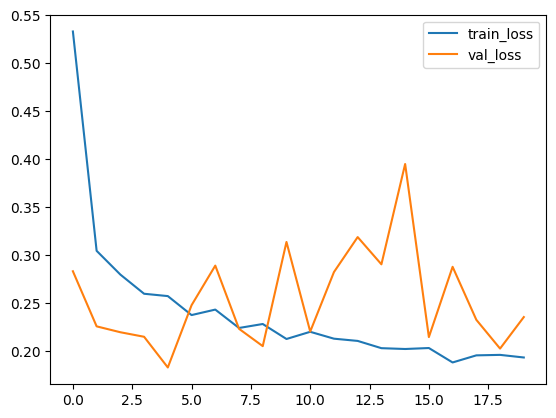

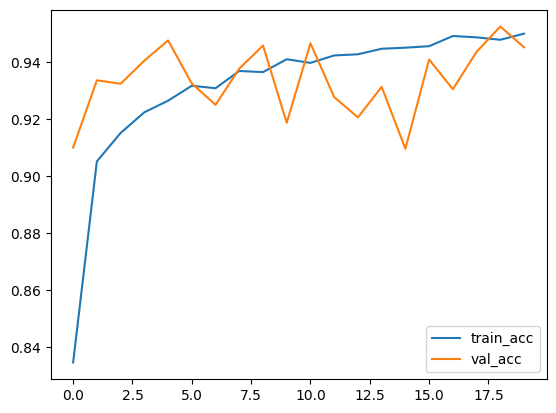

In [25]:
print(hist.history)
# Print the loss
plt.plot(hist.history['loss'], label='train_loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()
plt.savefig('LossVal_loss')
plt.show()

# Plot the accuracy
plt.plot(hist.history['accuracy'], label='train_acc')
plt.plot(hist.history['val_accuracy'], label='val_acc')
plt.legend()
plt.savefig('AccVal_acc')
plt.show()

# Final Verification

(1, 32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
[[1.4338891e-01 9.9257427e-08 1.4705283e-03 1.8037281e-09 7.1957260e-11
  8.5477555e-01 9.0261603e-09 3.6484524e-04 5.6611049e-11 8.1021166e-24]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
[[0.14338891208171844, 9.925742716632158e-08, 0.0014705283101648092, 1.8037280558047541e-09, 7.195725959530108e-11, 0.8547755479812622, 9.026160263658767e-09, 0.00036484524025581777, 5.661104918175397e-11, 8.1021166227909e-24]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


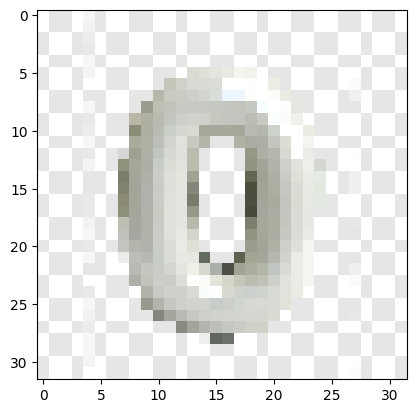

[5]


In [62]:
# Final verification
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.resnet50 import preprocess_input
img = image.load_img('veri0.jpg', target_size=(32,32))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0) # Increasing the rank
x = preprocess_input(x)
print(x.shape)
a = model.predict(x)
print(a)

arr = model.predict(x)
list1 = arr.tolist()
print(list1)
a1 = np.argmax(model.predict(x), axis=1)
plt.imshow(img)
plt.show()
print(a1)

(1, 32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step
[[1.3703979e-14 3.6933866e-16 4.9075499e-07 2.8999285e-20 6.1319016e-25
  1.9227309e-15 4.6171374e-07 9.9999905e-01 3.4415928e-11 4.4596692e-22]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step
[[1.3703979188136716e-14, 3.69338658133989e-16, 4.907549850940995e-07, 2.8999284990186973e-20, 6.131901604906368e-25, 1.9227309089493716e-15, 4.617137392415316e-07, 0.9999990463256836, 3.44159284404455e-11, 4.459669248752119e-22]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


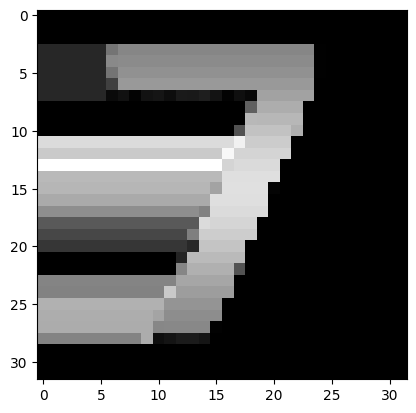

[7]


In [61]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.resnet50 import preprocess_input
img = image.load_img('veri7.png', target_size=(32,32))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0) # Increasing the rank
x = preprocess_input(x)
print(x.shape)
a = model.predict(x)
print(a)

arr = model.predict(x)
list1 = arr.tolist()
print(list1)
a1 = np.argmax(model.predict(x), axis=1)
plt.imshow(img)
plt.show()
print(a1)

(1, 32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
[[3.4667075e-10 1.9328357e-10 3.0293611e-03 6.7279998e-10 8.8930443e-14
  9.8919886e-01 3.1861180e-10 7.7717556e-03 1.6935626e-20 8.8067134e-31]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
[[3.4667074766403516e-10, 1.9328356970493843e-10, 0.0030293611343950033, 6.72799982393002e-10, 8.893044314188872e-14, 0.9891988635063171, 3.186118036069274e-10, 0.007771755568683147, 1.693562639116393e-20, 8.806713398394435e-31]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


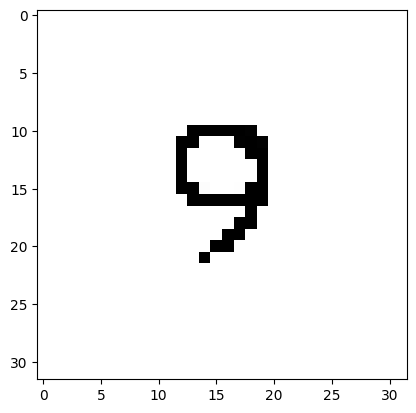

[5]


In [60]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.resnet50 import preprocess_input
img = image.load_img('veri9.jpg', target_size=(32,32))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0) # Increasing the rank
x = preprocess_input(x)
print(x.shape)
a = model.predict(x)
print(a)

arr = model.predict(x)
list1 = arr.tolist()
print(list1)
a1 = np.argmax(model.predict(x), axis=1)
plt.imshow(img)
plt.show()
print(a1)

(1, 32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
[[5.3136617e-01 2.7747873e-02 1.1883788e-01 6.7749197e-09 1.8514140e-06
  3.1935573e-01 2.7076034e-05 2.6529431e-03 9.2605851e-06 1.2299367e-06]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
[[0.5313661694526672, 0.027747873216867447, 0.1188378781080246, 6.774919736329821e-09, 1.8514140265324386e-06, 0.31935572624206543, 2.7076033802586608e-05, 0.0026529431343078613, 9.26058510231087e-06, 1.2299367426749086e-06]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


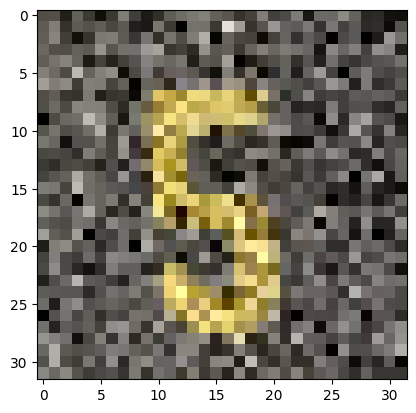

[0]


In [59]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.resnet50 import preprocess_input
img = image.load_img('veri5.jpg', target_size=(32,32))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0) # Increasing the rank
x = preprocess_input(x)
print(x.shape)
a = model.predict(x)
print(a)

arr = model.predict(x)
list1 = arr.tolist()
print(list1)
a1 = np.argmax(model.predict(x), axis=1)
plt.imshow(img)
plt.show()
print(a1)

(1, 32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
[[1.16902790e-07 1.43372058e-15 1.54154094e-08 8.25757280e-16
  1.63784758e-15 9.93090332e-01 8.81956021e-13 6.90960698e-03
  1.34087714e-17 3.61856694e-28]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
[[1.1690278967080303e-07, 1.433720577291098e-15, 1.541540939342667e-08, 8.257572795642852e-16, 1.637847576645504e-15, 0.9930903315544128, 8.81956020801905e-13, 0.006909606978297234, 1.3408771437413215e-17, 3.618566939044742e-28]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


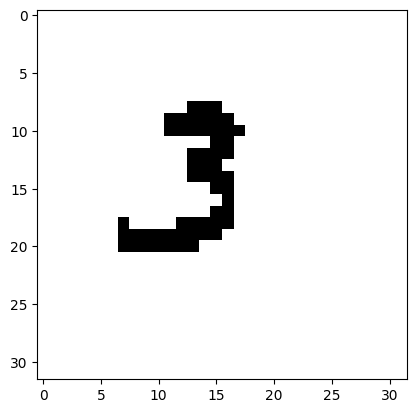

[5]


In [58]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.resnet50 import preprocess_input
img = image.load_img('veri3.jpg', target_size=(32,32))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0) # Increasing the rank
x = preprocess_input(x)
print(x.shape)
a = model.predict(x)
print(a)

arr = model.predict(x)
list1 = arr.tolist()
print(list1)
a1 = np.argmax(model.predict(x), axis=1)
plt.imshow(img)
plt.show()
print(a1)

In [63]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 128ms/step
[[4.28239715e-16 5.75976419e-11 3.84364043e-08 ... 9.99999940e-01
  1.19026655e-11 4.56765947e-15]
 [4.78728656e-14 5.55651913e-10 9.99999583e-01 ... 9.00073356e-17
  7.03431713e-09 1.28455989e-21]
 [3.83276874e-12 9.99984682e-01 3.98759812e-06 ... 1.33445166e-08
  9.85096813e-06 1.87004856e-09]
 ...
 [2.58425178e-22 5.07179076e-17 5.39088357e-11 ... 1.45928020e-10
  3.61133456e-09 3.59277493e-07]
 [6.58685259e-12 6.25075824e-10 1.15291188e-09 ... 3.17605952e-07
  8.18671833e-05 1.38032530e-10]
 [1.53628033e-13 1.89183154e-17 1.87189784e-08 ... 9.10418557e-19
  2.20006843e-11 1.30759345e-15]]
[7 2 1 ... 4 5 6]


Text(0.5, 1.0, 'Confusion Matrix')

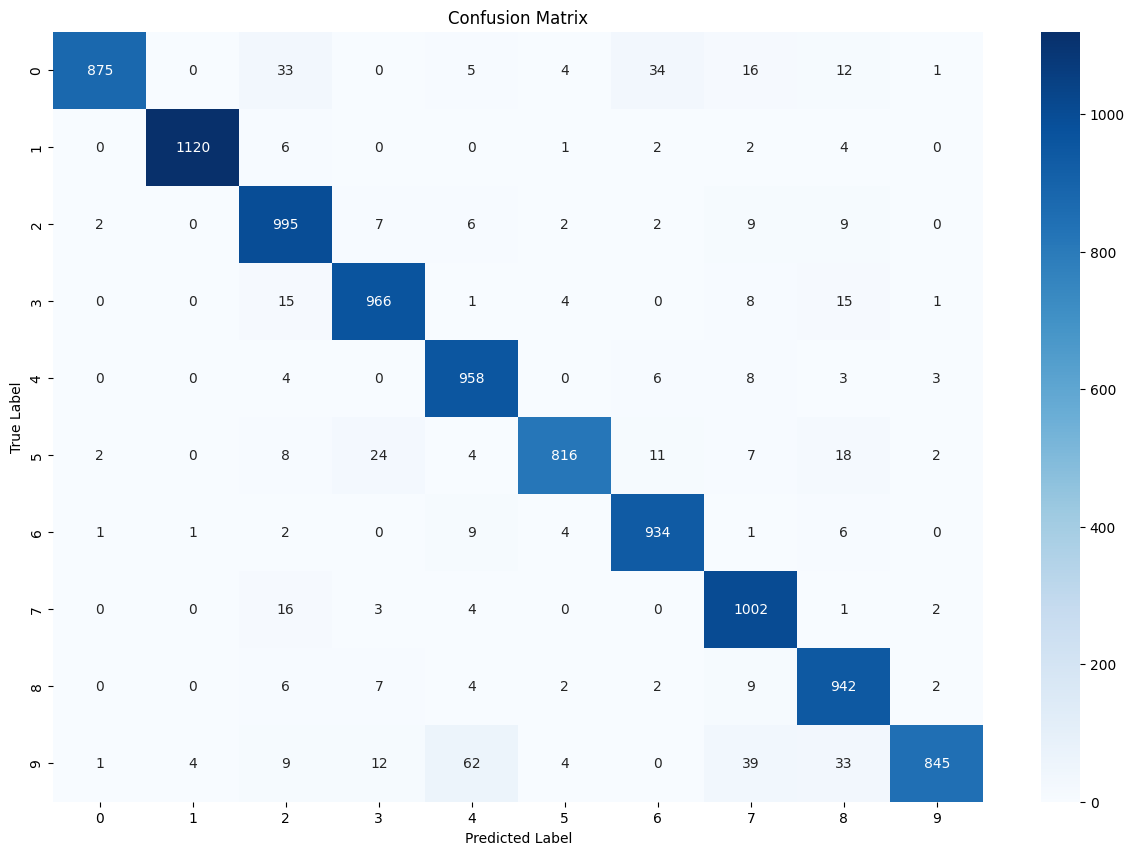

In [64]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_true = np.argmax(y_test, axis=1)
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d',ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')

In [66]:
from sklearn.metrics import classification_report
matrix1 = classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1), labels=[0,1,2,3,4,5,6,7,8,9])
print(matrix1)

              precision    recall  f1-score   support

           0       0.99      0.89      0.94       980
           1       1.00      0.99      0.99      1135
           2       0.91      0.96      0.94      1032
           3       0.95      0.96      0.95      1010
           4       0.91      0.98      0.94       982
           5       0.97      0.91      0.94       892
           6       0.94      0.97      0.96       958
           7       0.91      0.97      0.94      1028
           8       0.90      0.97      0.93       974
           9       0.99      0.84      0.91      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.94      0.94     10000
weighted avg       0.95      0.95      0.95     10000

